In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Define a quadratic loss function
def quadratic_loss(x, y):
    return x**2 + 10*y**2

In [5]:
#gradient of the loss function
def quadratic_grad(x , y):
    dx = 2*x
    dy = 20*y
    return np.array([dx, dy])

In [6]:
#Batch gradient decent algorithm
def batch_gradient(grad_func, eta, epochs, start_point):
    x, y = start_point
    path = [(x, y)]
    losses = [quadratic_loss(x, y)]
    
    for _ in range(epochs):
        grad = grad_func(x, y)
        x = x - eta * grad[0]
        y = y - eta * grad[1]
        path.append((x, y))
        losses.append(quadratic_loss(x, y))
        
    return np.array(path), losses

In [7]:
#Momentum gradient descent algorithm
def momentum_gradient(grad_func, eta, beta, epochs, start_point):
    x, y = start_point
    path = [(x, y)]
    v = np.array([0.0, 0.0])
    losses = [quadratic_loss(x, y)]
    
    for _ in range(epochs):
        grad = grad_func(x, y)
        v = beta * v + (1 - beta) * grad
        x = x - eta * v[0]
        y = y - eta * v[1]
        
        path.append((x, y))
        losses.append(quadratic_loss(x, y))
    
    return np.array(path), losses  
    

In [8]:
#Visualization functions for paths
def plot_paths(functions, paths,  labels, title):
     X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2,2,400))
     Z = quadratic_loss(X, Y)
     
     plt.figure(figsize=(10, 8))
     plt.contour(X, Y, Z, levels=50, cmap='jet')
     
     for path, label in zip(paths, labels):
          plt.plot(path[:, 0], path[:, 1], label=label)
          plt.scatter(path[0, 0], path[0, 1], color='red', label='Start')  # Start point
          plt.scatter(path[-1, 0], path[-1, 1], color='green', label='End')
          
     plt.title(title)
     plt.xlabel('x')
     plt.ylabel('y')
     plt.legend()
     plt.show()

In [9]:
# Visualization functions ofr the losses
def plot_losses(losses, labels, title):
    plt.figure(figsize=(10, 8))
    
    for loss, label in zip(losses, labels):
        plt.plot(loss, label=label)
        
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [10]:
eta_bgd = 0.1
eta_mgd = 0.1
beta_mgd = 0.9
epochs = 50
start_point = (1.5, 1.5)

In [11]:
#Run the algorithms
bgd_path, bgd_losses = batch_gradient(quadratic_grad, eta_bgd, epochs, start_point)
mgd_path, mgd_losses = momentum_gradient(quadratic_grad, eta_mgd, beta_mgd, epochs, start_point)

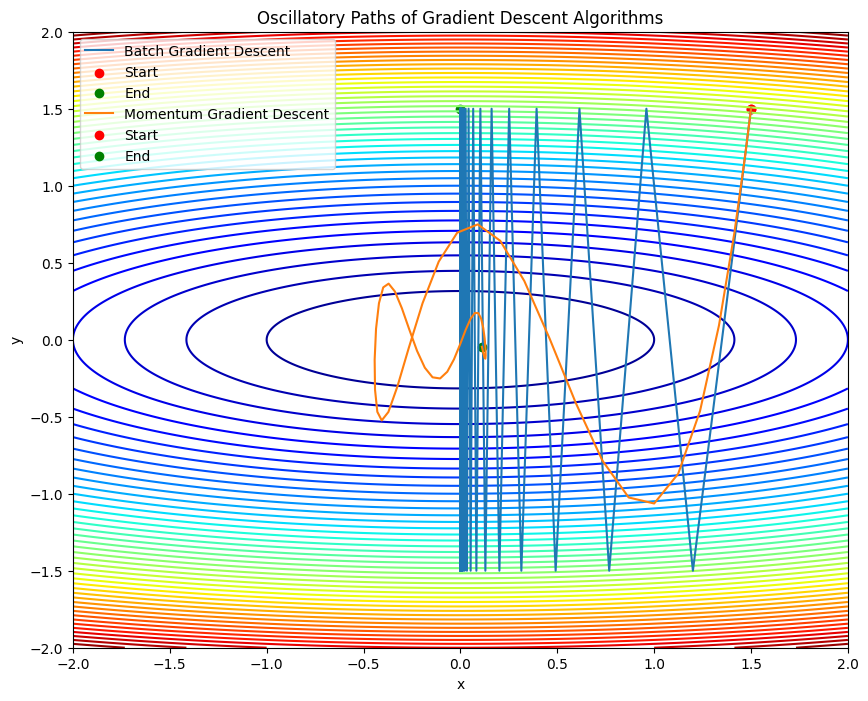

In [12]:
#plot the results for paths
plot_paths(quadratic_loss, [bgd_path, mgd_path], ['Batch Gradient Descent', 'Momentum Gradient Descent'], 'Oscillatory Paths of Gradient Descent Algorithms')

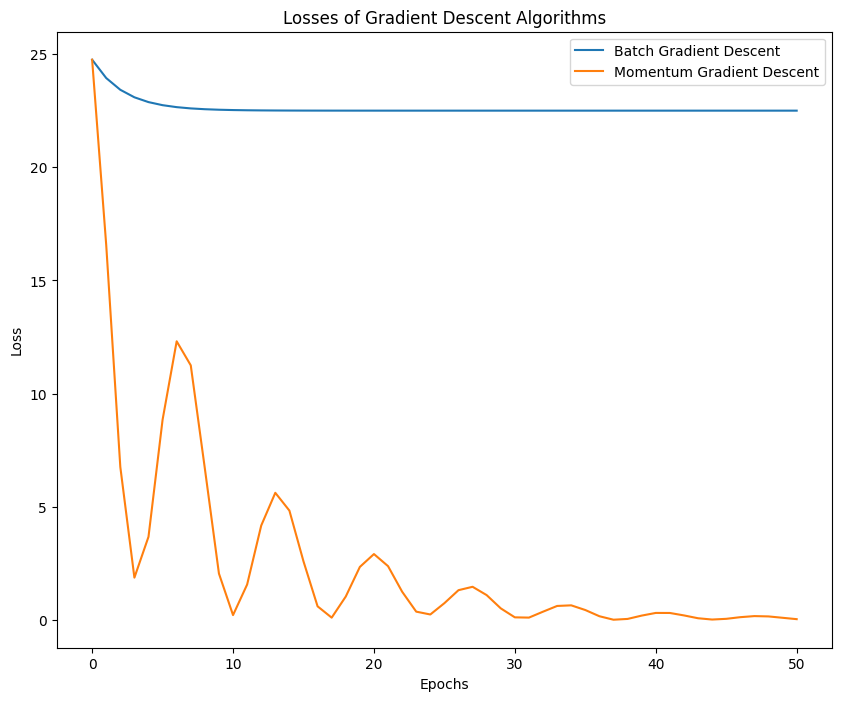

In [13]:
#plot the results for losses
plot_losses([bgd_losses, mgd_losses], ['Batch Gradient Descent', 'Momentum Gradient Descent'], 'Losses of Gradient Descent Algorithms')

In [14]:
#Changeing the parameters
eta_bgd = 0.2
eta_mgd = 0.2
beta_mgd = 0.9
epochs = 50
start_point = (1.5, 1.5)

In [15]:
#Run the algorithms
bgd_path, bgd_losses = batch_gradient(quadratic_grad, eta_bgd, epochs, start_point)
mgd_path, mgd_losses = momentum_gradient(quadratic_grad, eta_mgd, beta_mgd, epochs, start_point)

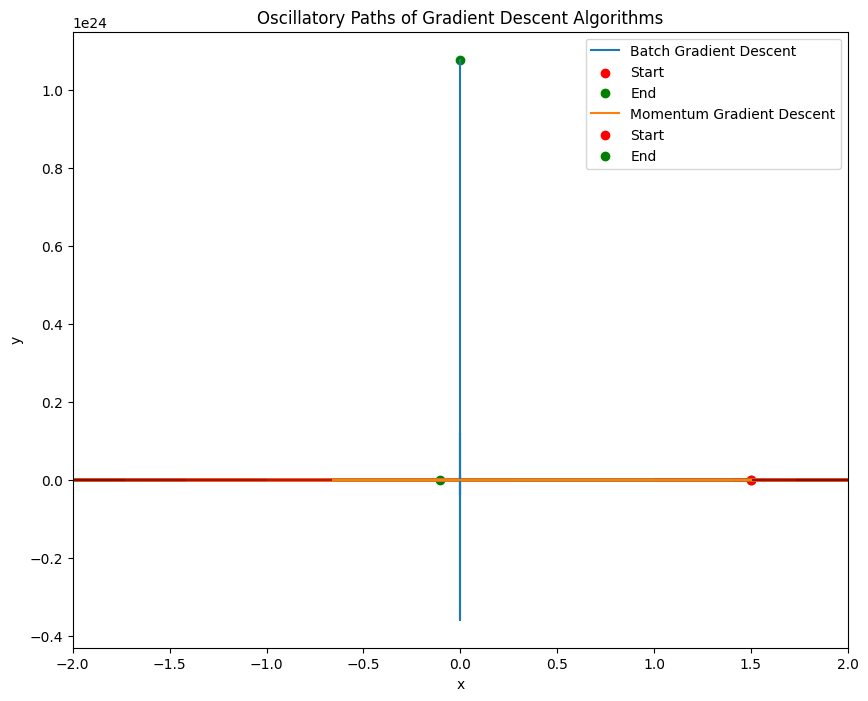

In [16]:
#plot the results for paths
plot_paths(quadratic_loss, [bgd_path, mgd_path], ['Batch Gradient Descent', 'Momentum Gradient Descent'], 'Oscillatory Paths of Gradient Descent Algorithms')

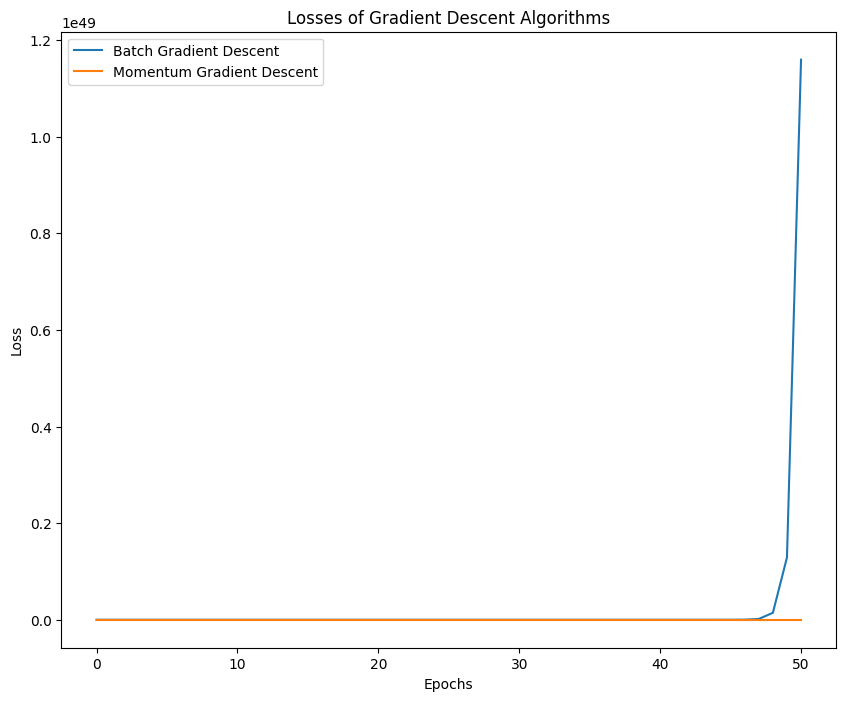

In [17]:
#plot the results for losses
plot_losses([bgd_losses, mgd_losses], ['Batch Gradient Descent', 'Momentum Gradient Descent'], 'Losses of Gradient Descent Algorithms')